# 프로젝트 : 가위바위보 분류기를 만들자

오늘 배운 내용을 바탕으로 가위바위보 분류기를 만들도록 하겠습니다. 가장 먼저 해야 할 일은 뭘까요? 네, 첫 번째!!!! 데이터를 준비해야 합니다. 가위바위보 이미지를 모아 놓은 곳은 없으므로, 우리가 직접 사진을 찍어서 모아봅시다.

<br>

### 라이브러리 버전을 확인해 봅니다

사용할 라이브러리 버전을 둘러봅시다.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


In [2]:
# https://laurencemoroney.com/datasets.html
# Rock Paper Scissors Dataset

# training set
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip

# validation set
#!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-validation.zip

# test set
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip

--2022-11-04 02:06:45--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 142.250.99.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M  46.0MB/s    in 5.0s    

2022-11-04 02:06:50 (38.5 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2022-11-04 02:06:51--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.128, 173.194.202.128, 173.194.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-s

In [3]:
from zipfile import ZipFile

# zipfile 모듈의 ZipFile 클래스를 사용하면 zip 파일을 풀 수 있음.
# ZipFile()의 파라미터로 zip 파일 경로를 전달함.
# with문으로 할당한 zipper 객체에 extractall() 메서드 호출시 zip 파일의 압축을 품.

# 훈련 이미지 데이터 압축 풀기
with ZipFile('/aiffel/aiffel/Exploration-5/rps.zip') as zipper:
    zipper.extractall()

# 테스트 이미지 데이터 압축 풀기
with ZipFile('/aiffel/aiffel/Exploration-5/rps-test-set.zip') as zipper:
    zipper.extractall()

<br>

### 데이터 불러오기 + Resize 하기

숫자 손글씨의 경우 이미지 크기가 28x28 이었지만, 이번에는 가위, 바위, 보 이미지는 128x128로 만들겠습니다. 이를 위해서는 PIL 라이브러리를 사용해볼 거예요. 그러려면 먼저 라이브러리를 불러와야 겠죠?

In [4]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


이제 가위 이미지를 불러와서 128x128 사이즈로 변경할 겁니다. 아래 코드를 실행해보세요. 이미지의 크기가 128x128 로 바뀌었나요?

In [5]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.png")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 128x128 사이즈로 바꾸어 저장합니다.
    target_size=(128,128)
    for img in images:
        old_img=Image.open(img).convert('RGB')
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img)
    
    print(len(images), " images resized.")

In [6]:
# Training Set
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 변환
image_dir_path = os.getenv("HOME") + "/aiffel/Exploration-5/rps/scissors"
resize_images(image_dir_path)

print("Scissor image 128 x 128 resized is done.!\n")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 변환
image_dir_path = os.getenv("HOME") + "/aiffel/Exploration-5/rps/rock"
resize_images(image_dir_path)

print("Rock image 128 x 128 resized is done.!\n")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 변환
image_dir_path = os.getenv("HOME") + "/aiffel/Exploration-5/rps/paper"
resize_images(image_dir_path)

print("Paper image 128 x 128 resized is done.!\n")

840  images to be resized.
840  images resized.
Scissor image 128 x 128 resized is done.!

840  images to be resized.
840  images resized.
Rock image 128 x 128 resized is done.!

840  images to be resized.
840  images resized.
Paper image 128 x 128 resized is done.!



In [7]:
# Test Set
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 변환
image_dir_path = os.getenv("HOME") + "/aiffel/Exploration-5/rps-test-set/scissors"
resize_images(image_dir_path)

print("Scissor image 128 x 128 resized is done.!\n")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 변환
image_dir_path = os.getenv("HOME") + "/aiffel/Exploration-5/rps-test-set/rock"
resize_images(image_dir_path)

print("Rock image 128 x 128 resized is done.!\n")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 변환
image_dir_path = os.getenv("HOME") + "/aiffel/Exploration-5/rps-test-set/paper"
resize_images(image_dir_path)

print("Paper image 128 x 128 resized is done.!\n")

124  images to be resized.
124  images resized.
Scissor image 128 x 128 resized is done.!

124  images to be resized.
124  images resized.
Rock image 128 x 128 resized is done.!

124  images to be resized.
124  images resized.
Paper image 128 x 128 resized is done.!



숫자 손글씨 인식기는 mnist.load_data() 라는 함수로 데이터를 읽었던 것 기억하시죠? 여러분들이 아직 코딩에 익숙하지 않을 수 있으므로, 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수를 만들어 드릴 거예요. 이 코드를 활용하면 임의의 사진 데이터(ex. 귤이 잘 익었나, 안 익었나? 웃는 얼굴인가, 우는 얼굴인가, 평범한 표정의 얼굴인가? 등)에 적용하실 수 있을 겁니다.

load_data() 함수는 입력으로 이미지가 있는 폴더 위치를 받습니다. 여기서는 rock_scissor_paper 폴더 위치를 적어주면 됩니다. 숫자 손글씨는 0~9 까지의 클래스가 있었던 것 기억하시죠? 가위바위보의 경우 3개의 클래스 즉, **가위: 0, 바위: 1, 보: 2** 로 라벨링이 될 것입니다.

In [8]:
import numpy as np

def load_data(img_path, number_of_data=840*3):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=128
    color=3
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [9]:
from sklearn.model_selection import train_test_split

image_dir_path = os.getenv("HOME") + "/aiffel/Exploration-5/rps"
(x_train, y_train)=load_data(image_dir_path)

x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

#훈련data 검증data
x_train, x_val, y_train, y_val = train_test_split(x_train_norm, y_train, shuffle=True, test_size=0.3)

print("x_train shape: {}".format(x_train.shape))
print("x_val shape: {}".format(x_val.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_val shape: {}".format(y_val.shape))

학습데이터(x_train)의 이미지 개수는 2520 입니다.
x_train shape: (1764, 128, 128, 3)
x_val shape: (756, 128, 128, 3)
y_train shape: (1764,)
y_val shape: (756,)


한번 이미지를 불러 볼까요?

라벨:  0


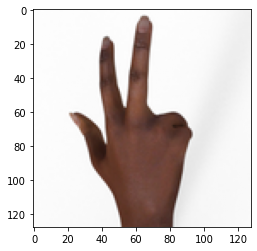

In [10]:
# train
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

라벨:  1


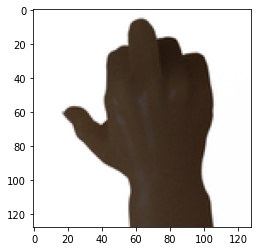

In [11]:
# val
plt.imshow(x_val[0])
print('라벨: ', y_val[0])

<br>

### 딥러닝 네트워크 설계하기

자 이제 데이터의 준비가 끝났습니다. 이제 여러분들이 가위바위보를 인식하는 딥러닝 네트워크를 설계해 볼까요?

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  8
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               6553700   
_________________________________________________________________
dropout (Dropout)            (No

### 딥러닝 네트워크 학습시키기

잘 설계가 되었다면, 이제 학습을 시켜봅시다. 아마도 여러분들의 데이터는 거의 비슷비슷할 것이기 때문에 accuracy가 꽤 높게 나올 것입니다.

* 콜백은 모델을 훈련하는 도중에 어떤 작업을 수행할 수 있도록 도와주는 도구로 최상의 모델을 자동으로 저장 및 조기종료를 사용할 수 있다.
* ModelCheckpoint는 모델과 가중치를 일정 간격으로 저장하며, save_brst_only를 지정해 가장 낮은 검증 점수를 만드는 모델을 저장한다.
* 조기종료란 과대적합이 시작되기 전에 훈련을 미리 중지하는 기법
* EarlyStopping을 만들어 조기종료기법 수행
* patience는 매개변수에 모델이 더 이상 향상되지 않고 지속할 수 있는 최대 에포크 횟수를 지정
* restore_best_weights는 매개변수에 최상의 모델 가중치를 복원할지 지정
* history 객체에 훈련과정에서 계산한 지표, 즉 손실과 정확도 값이 저장되어 있음 또한 추가 가능

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
56/56 [==============================] - 5s 29ms/step - loss: 1.1862 - accuracy: 0.5578 - val_loss: 0.3734 - val_accuracy: 0.9299
Epoch 2/10
56/56 [==============================] - 1s 16ms/step - loss: 0.2009 - accuracy: 0.9376 - val_loss: 0.0420 - val_accuracy: 0.9921
Epoch 3/10
56/56 [==============================] - 1s 16ms/step - loss: 0.0504 - accuracy: 0.9875 - val_loss: 0.0119 - val_accuracy: 0.9987
Epoch 4/10
56/56 [==============================] - 1s 16ms/step - loss: 0.0247 - accuracy: 0.9960 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 5/10
56/56 [==============================] - 1s 16ms/step - loss: 0.0191 - accuracy: 0.9960 - val_loss: 0.0039 - val_accuracy: 0.9987
Epoch 6/10
56/56 [==============================] - 1s 16ms/step - loss: 0.0109 - accuracy: 0.9977 - val_loss: 0.0021 - val_accuracy: 0.9987
Epoch 7/10
56/56 [==============================] - 1s 16ms/step - loss: 0.0077 - accuracy: 0.9994 - val_loss: 5.5873e-04 - val_accuracy: 1.0000
Epoch 8/1

<br>

### 얼마나 잘 만들었는지 확인하기(테스트)

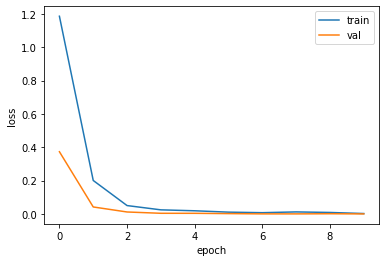

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [15]:
image_dir_path = os.getenv("HOME") + "/aiffel/Exploration-5/rps-test-set"
(x_test, y_test)=load_data(image_dir_path, number_of_data=372)

x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_test_norm.shape))
print("y_train shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 372 입니다.
x_train shape: (372, 128, 128, 3)
y_train shape: (372,)


In [16]:
model.evaluate(x_test_norm, y_test)

12/12 [==============================] - 0s 6ms/step - loss: 1.8943 - accuracy: 0.7473


[1.8943268060684204, 0.7473118305206299]

### 노드를 마치며...

여러분 미니 프로젝트는 잘 마치셨나요? 여러분은 이번 노드를 통해 다음의 내용을 배웠습니다.

- 이미 잘 정제된 10개 클래스의 숫자 손글씨 데이터를 분류하는 classifier 만들기
- 정제되지 않은 웹캠 사진으로부터 데이터 만들어보기
- 흑백 사진이 아닌 컬러 사진을 학습하는 classifier 만들기
- 분류하고자 하는 클래스의 개수를 마음대로 조절하기 (10개에서 3개로)